In [ ]:
import pandas as pd

try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
    display(df.info())
    display(df.head())
except FileNotFoundError:
    print("Error: 'spam.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred: {e}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('v2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['v2'].value_counts()
    for x_label, grp in _df_2.groupby('v1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('v1')
_ = plt.ylabel('v2')

In [ ]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
display(df.head())

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['message'].value_counts()
    for x_label, grp in _df_5.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('message')

Shape of the DataFrame: (5572, 2)

Data Types:
 label      object
message    object
dtype: object

Target Variable Distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


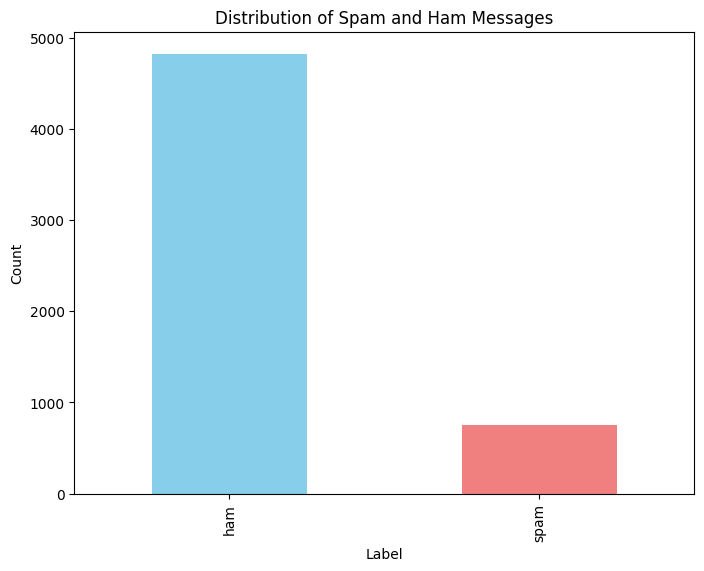


Missing Values:
 label      0
message    0
dtype: int64

Summary Statistics of Message Column:
        message_length   word_count
count     5572.000000  5572.000000
mean        80.118808    15.494436
std         59.690841    11.329427
min          2.000000     1.000000
25%         36.000000     7.000000
50%         61.000000    12.000000
75%        121.000000    23.000000
max        910.000000   171.000000

Most Frequent words in spam message
[('to', 604), ('a', 358), ('your', 187), ('call', 185), ('or', 185), ('the', 178), ('2', 169), ('for', 169), ('you', 164), ('is', 143)]

Most Frequent words in ham message
[('to', 1530), ('you', 1458), ('I', 1436), ('the', 1019), ('a', 969), ('and', 738), ('i', 736), ('in', 734), ('u', 645), ('is', 638)]


In [ ]:
import matplotlib.pyplot as plt
print("Shape of the DataFrame:", df.shape)

print("\nData Types:\n", df.dtypes)

print("\nTarget Variable Distribution:\n", df['label'].value_counts())
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

print("\nMissing Values:\n", df.isnull().sum())

df['message_length'] = df['message'].str.len()
df['word_count'] = df['message'].str.split().str.len()
print("\nSummary Statistics of Message Column:\n", df[['message_length', 'word_count']].describe())

print("\nMost Frequent words in spam message")
spam_words = ' '.join(df[df['label'] == 'spam']['message']).split()
from collections import Counter
spam_word_counts = Counter(spam_words)
print(spam_word_counts.most_common(10))

print("\nMost Frequent words in ham message")
ham_words = ' '.join(df[df['label'] == 'ham']['message']).split()
ham_word_counts = Counter(ham_words)
print(ham_word_counts.most_common(10))

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['message'] = df['message'].apply(clean_text)
display(df.head())

,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['message'].value_counts()
    for x_label, grp in _df_8.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('message')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vectorizer_1gram = TfidfVectorizer(ngram_range=(1, 1), max_features=5000)
tfidf_vectorizer_2gram = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
tfidf_vectorizer_3gram = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

tfidf_matrix_1gram = tfidf_vectorizer_1gram.fit_transform(df['message'])
tfidf_matrix_2gram = tfidf_vectorizer_2gram.fit_transform(df['message'])
tfidf_matrix_3gram = tfidf_vectorizer_3gram.fit_transform(df['message'])

tfidf_array_1gram = tfidf_matrix_1gram.toarray()
tfidf_array_2gram = tfidf_matrix_2gram.toarray()
tfidf_array_3gram = tfidf_matrix_3gram.toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X = tfidf_array_1gram
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (4457, 5000)
X_test shape: (557, 5000)
X_val shape: (558, 5000)
y_train shape: (4457,)
y_test shape: (557,)
y_val shape: (558,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

nb_model = MultinomialNB()
lr_model = LogisticRegression(solver='liblinear')
svm_model = SVC(kernel='linear')

nb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import f1_score

alpha_values = [0.1, 0.5, 1.0, 2.0]
best_alpha = None
best_f1_nb = 0
for alpha in alpha_values:
    nb_model = MultinomialNB(alpha=alpha)
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_val)
    f1_nb = f1_score(y_val, y_pred_nb, pos_label='spam')
    if f1_nb > best_f1_nb:
        best_f1_nb = f1_nb
        best_alpha = alpha

print(f"Best alpha for Naive Bayes: {best_alpha}, F1-score: {best_f1_nb}")

c_values = [0.1, 1, 10, 100]
best_c = None
best_f1_lr = 0
for c in c_values:
    lr_model = LogisticRegression(C=c, solver='liblinear')
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_val)
    f1_lr = f1_score(y_val, y_pred_lr, pos_label='spam')
    if f1_lr > best_f1_lr:
        best_f1_lr = f1_lr
        best_c = c

print(f"Best C for Logistic Regression: {best_c}, F1-score: {best_f1_lr}")

kernels = ['rbf', 'poly']
best_kernel = None
best_gamma = None
best_degree = None
best_f1_svm = 0

for kernel in kernels:
    if kernel == 'rbf':
        for gamma in [0.1, 1, 10]:
            svm_model = SVC(kernel=kernel, gamma=gamma)
            svm_model.fit(X_train, y_train)
            y_pred_svm = svm_model.predict(X_val)
            f1_svm = f1_score(y_val, y_pred_svm, pos_label='spam')
            if f1_svm > best_f1_svm:
                best_f1_svm = f1_svm
                best_kernel = kernel
                best_gamma = gamma
    elif kernel == 'poly':
        for degree in [2, 3, 4]:
            svm_model = SVC(kernel=kernel, degree=degree)
            svm_model.fit(X_train, y_train)
            y_pred_svm = svm_model.predict(X_val)
            f1_svm = f1_score(y_val, y_pred_svm, pos_label='spam')
            if f1_svm > best_f1_svm:
                best_f1_svm = f1_svm
                best_kernel = kernel
                best_degree = degree

print(f"Best kernel for SVM: {best_kernel}, gamma: {best_gamma}, degree: {best_degree}, F1-score: {best_f1_svm}")

Best alpha for Naive Bayes: 0.1, F1-score: 0.9583333333333334
Best C for Logistic Regression: 100, F1-score: 0.9436619718309859
Best kernel for SVM: rbf, gamma: 1, degree: None, F1-score: 0.9051094890510949


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

nb_model = MultinomialNB(alpha=0.1)
lr_model = LogisticRegression(C=100, solver='liblinear')
svm_model = SVC(kernel='rbf', gamma=1)

nb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

models = {
    'Naive Bayes': y_pred_nb,
    'Logistic Regression': y_pred_lr,
    'SVM': y_pred_svm
}
results = []
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    conf_matrix = confusion_matrix(y_test, y_pred)
    results.append([model_name, accuracy, precision, recall, f1, conf_matrix])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Confusion Matrix'])
display(results_df)

,Model,Accuracy,Precision,Recall,F1-score,Confusion Matrix
0,Naive Bayes,0.978456,0.955882,0.878378,0.915493,"[[480, 3], [9, 65]]"
1,Logistic Regression,0.985637,0.985294,0.905405,0.943662,"[[482, 1], [7, 67]]"
2,SVM,0.976661,1.000000,0.824324,0.903704,"[[483, 0], [13, 61]]"


from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['F1-score'].plot(kind='hist', bins=20, title='F1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Recall', y='F1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Precision']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Precision', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Precision']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Precision', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Precision']
  ys = series['F1-score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Precision', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('F1-score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Precision']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Precision'}, axis=1)
              .sort_values('Precision', ascending=True))
  xs = counted['Precision']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Precision', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['F1-score'].plot(kind='line', figsize=(8, 4), title='F1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='F1-score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)